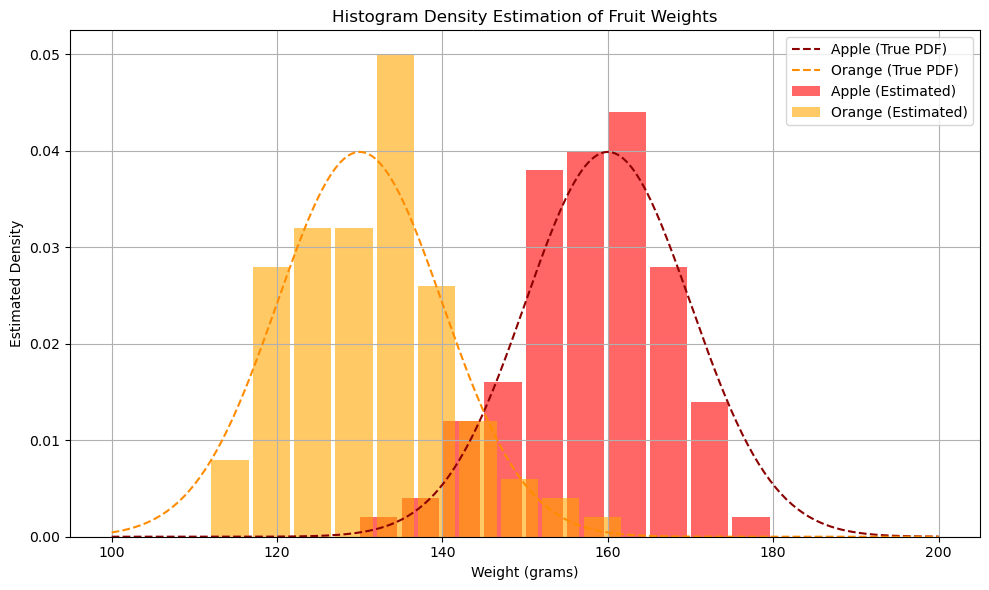

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# -------------------------------
# 🍎🍊 Step 1: Simulate Fruit Weights
# -------------------------------

np.random.seed(42)  # For reproducibility

# Simulate apple weights (mean=160g, std=10g)
apple_weights = np.random.normal(loc=160, scale=10, size=100)

# Simulate orange weights (mean=130g, std=10g)
orange_weights = np.random.normal(loc=130, scale=10, size=100)

# Combine weights for overall range
all_weights = np.concatenate([apple_weights, orange_weights])

# -------------------------------
# 📊 Step 2: Histogram Density Estimation
# -------------------------------

# Choose bin width
bin_width = 5
min_val, max_val = all_weights.min(), all_weights.max()

# Define bin edges
bins = np.arange(min_val, max_val + bin_width, bin_width)

# Compute raw histograms (not normalized yet)
apple_hist, _ = np.histogram(apple_weights, bins=bins, density=False)
orange_hist, _ = np.histogram(orange_weights, bins=bins, density=False)

# Normalize to get density estimates
n_apple = len(apple_weights)
n_orange = len(orange_weights)

apple_density = apple_hist / (n_apple * bin_width)
orange_density = orange_hist / (n_orange * bin_width)

# Compute bin centers for plotting
bin_centers = (bins[:-1] + bins[1:]) / 2

# -------------------------------
# 📈 Step 3: Visualize the Estimated Densities
# -------------------------------

plt.figure(figsize=(10, 6))

# Bar plots of estimated densities
plt.bar(bin_centers - 1, apple_density, width=bin_width * 0.9, alpha=0.6, label="Apple (Estimated)", color="red")
plt.bar(bin_centers + 1, orange_density, width=bin_width * 0.9, alpha=0.6, label="Orange (Estimated)", color="orange")

# Plot true PDFs for comparison
x_vals = np.linspace(100, 200, 300)
apple_true_pdf = norm.pdf(x_vals, loc=160, scale=10)
orange_true_pdf = norm.pdf(x_vals, loc=130, scale=10)

plt.plot(x_vals, apple_true_pdf, color="darkred", linestyle="--", label="Apple (True PDF)")
plt.plot(x_vals, orange_true_pdf, color="darkorange", linestyle="--", label="Orange (True PDF)")

# Add labels, legend, and formatting
plt.title("Histogram Density Estimation of Fruit Weights")
plt.xlabel("Weight (grams)")
plt.ylabel("Estimated Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
